# Multilayer Perceptron Classifier


Let's set some setting for this Jupyter Notebook.

In [2]:
%matplotlib inline   
from warnings import filterwarnings
filterwarnings("ignore")
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['THEANO_FLAGS'] = 'device=cpu'    
    
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(12345)
rc = {'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20, 'font.size': 20, 
      'legend.fontsize': 12.0, 'axes.titlesize': 10, "figure.figsize": [12, 6]}
sns.set(rc = rc)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

 Now, let's import the `MLPClassifier` algorithm from the `pymc-learn` package.

In [3]:
import pmlearn
from pmlearn.neural_network import MLPClassifier
print('Running on pymc-learn v{}'.format(pmlearn.__version__))

Running on pymc-learn v0.0.1.rc0


## Step 1: Prepare the data
Generate synthetic data.

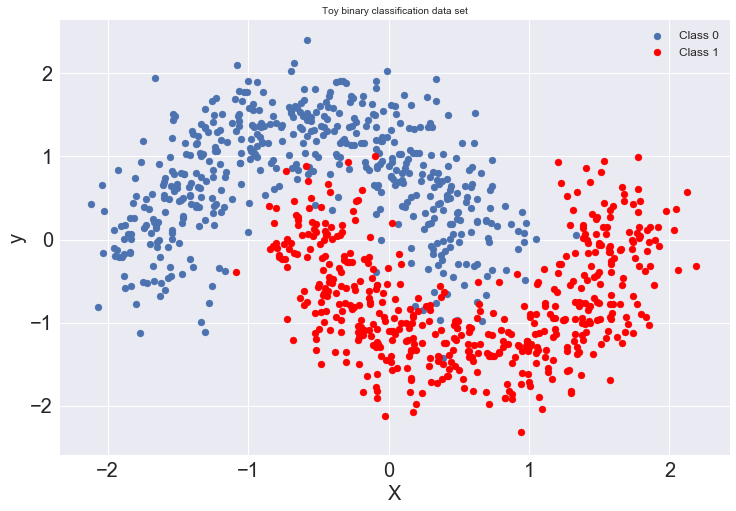

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
import theano
floatX = theano.config.floatX

X, y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X = X.astype(floatX)
y = y.astype(floatX)

## Plot the data 
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X[y==0, 0], X[y==0, 1], label='Class 0')
ax.scatter(X[y==1, 0], X[y==1, 1], color='r', label='Class 1')
sns.despine(); ax.legend()
ax.set(xlabel='X', ylabel='y', title='Toy binary classification data set');

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Step 2: Instantiate a model

In [6]:
model = MLPClassifier()

## Step 3: Perform Inference

In [7]:
model.fit(X_train, y_train)

Average Loss = 140.51: 100%|██████████| 200000/200000 [02:46<00:00, 1203.69it/s]
Finished [100%]: Average Loss = 140.52


MLPClassifier(n_hidden=5)

## Step 4: Diagnose convergence

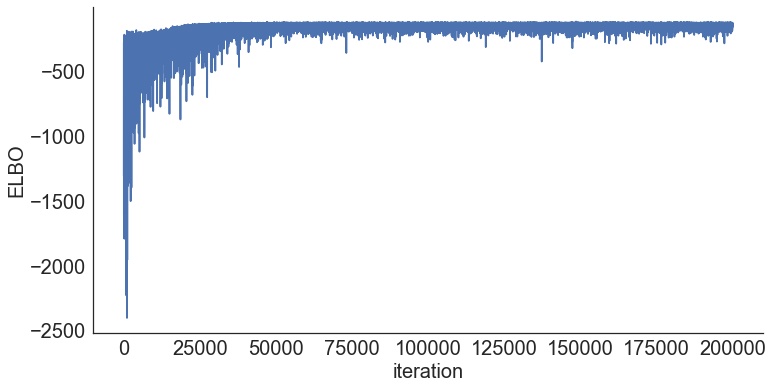

In [8]:
model.plot_elbo()

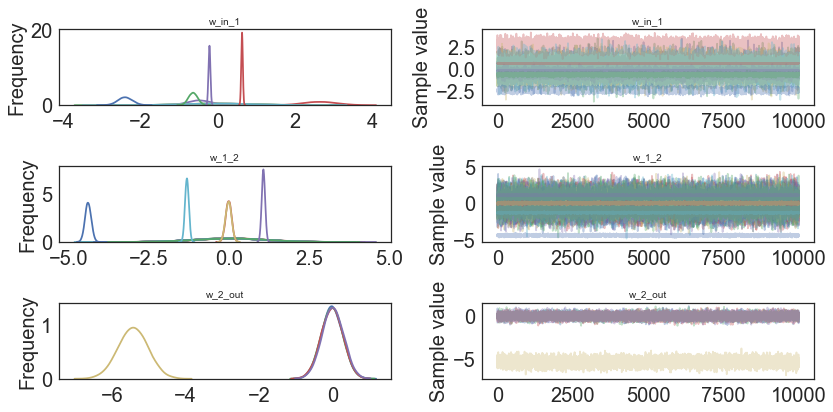

In [9]:
pm.traceplot(model.trace);

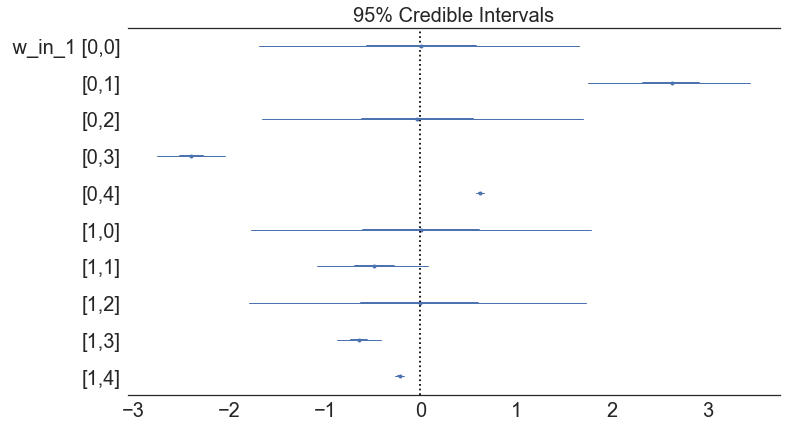

In [10]:
pm.forestplot(model.trace, varnames=["w_in_1"]);

## Step 5: Critize the model

In [11]:
pm.summary(model.trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
w_in_1__0_0,0.005568,0.853588,0.008590,-1.690336,1.657664
w_in_1__0_1,2.625947,0.430473,0.004169,1.754085,3.449592
w_in_1__0_2,-0.029436,0.857784,0.007223,-1.654908,1.703846
w_in_1__0_3,-2.395630,0.181738,0.001690,-2.751851,-2.040889
w_in_1__0_4,0.622473,0.020184,0.000191,0.584093,0.663157
w_in_1__1_0,0.004472,0.913144,0.009296,-1.776564,1.778230
w_in_1__1_1,-0.481947,0.301163,0.003205,-1.086732,0.082603
w_in_1__1_2,0.005991,0.899893,0.007878,-1.798096,1.727599
w_in_1__1_3,-0.643017,0.116311,0.001178,-0.872403,-0.415040
w_in_1__1_4,-0.219521,0.024275,0.000220,-0.266726,-0.171858


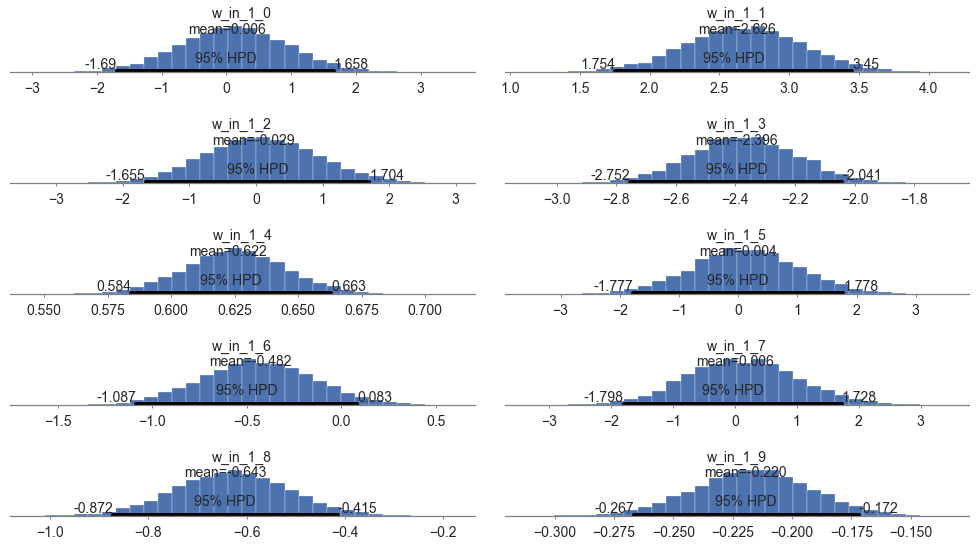

In [12]:
pm.plot_posterior(model.trace, varnames=["w_in_1"], 
                 figsize = [14, 8]);

## Step 6: Use the model for prediction

In [13]:
y_pred = model.predict(X_test)

100%|██████████| 2000/2000 [00:00<00:00, 2578.43it/s]


In [14]:
y_pred

array([False,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,

In [15]:
model.score(X_test, y_test)

100%|██████████| 2000/2000 [00:00<00:00, 2722.33it/s]


0.95999999999999996

In [16]:
model.save('pickle_jar/mlpc')

#### Use already trained model for prediction

In [17]:
model_new = MLPClassifier()
model_new.load('pickle_jar/mlpc')
model_new.score(X_test, y_test)

100%|██████████| 2000/2000 [00:00<00:00, 2619.50it/s]


0.95999999999999996

## MCMC

### Perform inference

In [18]:
model2 = MLPClassifier()
model2.fit(X_train, y_train, inference_type='nuts')

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w_2_out, w_1_2, w_in_1]
100%|██████████| 2500/2500 [04:25<00:00,  9.42it/s]
There were 125 divergences after tuning. Increase `target_accept` or reparameterize.
There were 228 divergences after tuning. Increase `target_accept` or reparameterize.
There were 210 divergences after tuning. Increase `target_accept` or reparameterize.
There were 32 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


MLPClassifier(n_hidden=5)

### Diagnose convergence

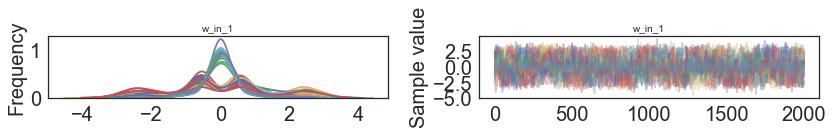

In [19]:
pm.traceplot(model2.trace, varnames=["w_in_1"]);

In [20]:
pm.gelman_rubin(model2.trace)

{'w_in_1': array([[ 1.03392059,  1.00889386,  1.0116798 ,  1.00952281,  1.00310832],
        [ 1.00180089,  1.00662138,  1.00244567,  1.00753298,  1.00338383]]),
 'w_1_2': array([[ 0.99999921,  1.00373929,  1.00043873,  1.00022153,  1.00150073],
        [ 1.00202154,  1.00028483,  1.00173403,  1.00384901,  1.00022611],
        [ 1.00035073,  1.00026924,  1.00524066,  1.00006522,  1.00168698],
        [ 1.00206691,  1.00377702,  1.00243599,  1.00069978,  1.00472955],
        [ 0.99978974,  0.99992665,  1.00151647,  1.00214903,  1.00018014]]),
 'w_2_out': array([ 1.01048089,  1.0018095 ,  1.00558228,  1.00216195,  1.00162127])}

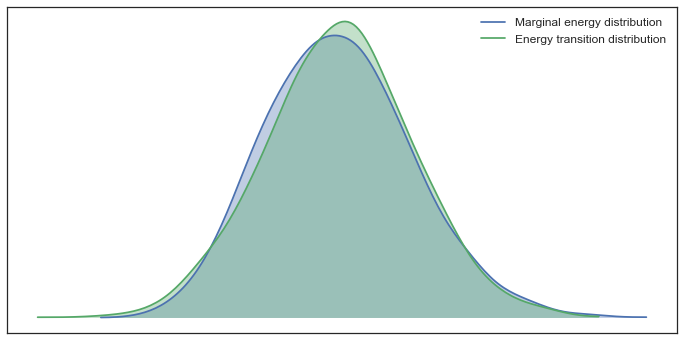

In [21]:
pm.energyplot(model2.trace);

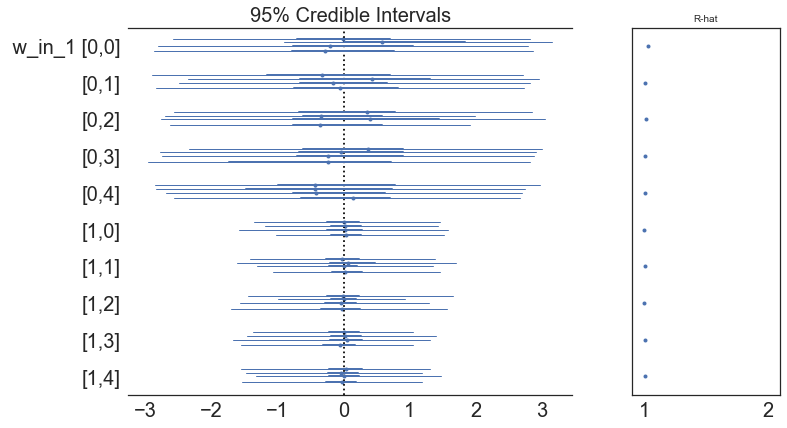

In [22]:
pm.forestplot(model2.trace, varnames=["w_in_1"]);

### Criticize the model

In [23]:
pm.summary(model2.trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
w_in_1__0_0,0.225135,1.453129,0.090766,-2.600963,2.967663,165.262816,1.033921
w_in_1__0_1,0.040237,1.432005,0.092519,-2.821038,2.733033,156.605213,1.008894
w_in_1__0_2,0.018382,1.318325,0.084790,-2.654008,2.752361,152.086243,1.011680
w_in_1__0_3,0.059441,1.520335,0.099235,-2.778439,2.907296,171.541523,1.009523
w_in_1__0_4,-0.105049,1.467413,0.106934,-2.821507,2.759036,142.862990,1.003108
w_in_1__1_0,0.038815,0.617805,0.021710,-1.325060,1.497353,811.520570,1.001801
w_in_1__1_1,0.048561,0.651136,0.033623,-1.387215,1.528355,315.526252,1.006621
w_in_1__1_2,-0.040393,0.630075,0.029703,-1.522670,1.369573,350.442761,1.002446
w_in_1__1_3,-0.006621,0.615670,0.023998,-1.488595,1.321337,588.732171,1.007533
w_in_1__1_4,-0.022356,0.602055,0.023388,-1.399013,1.409409,630.152499,1.003384


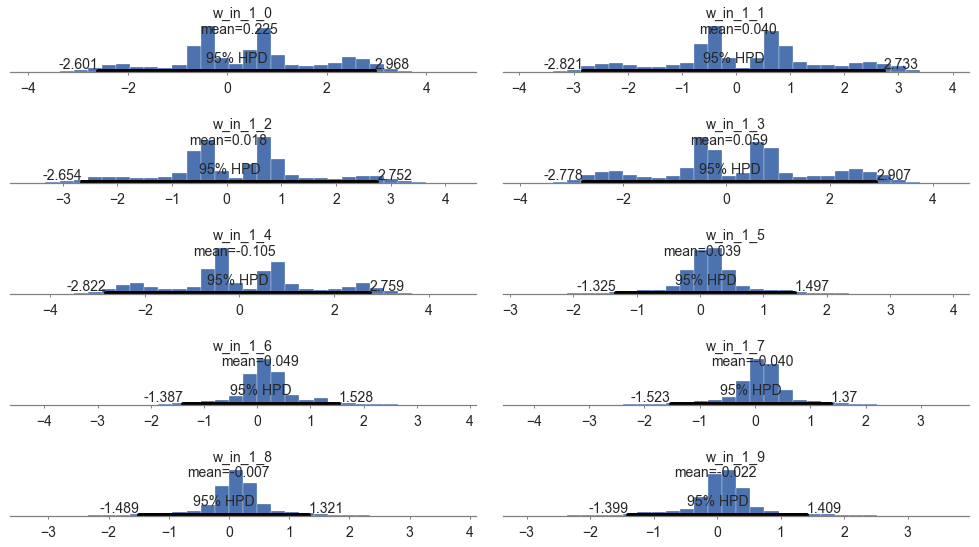

In [24]:
pm.plot_posterior(model2.trace, varnames=["w_in_1"], 
                 figsize = [14, 8]);

### Use the model for prediction

In [25]:
y_pred2 = model2.predict(X_test)

100%|██████████| 2000/2000 [00:00<00:00, 2569.74it/s]


In [26]:
y_pred2

array([False,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,

In [27]:
model2.score(X_test, y_test)

100%|██████████| 2000/2000 [00:00<00:00, 2645.86it/s]


0.96333333333333337

In [28]:
model2.save('pickle_jar/mlpc2')
model2_new = MLPClassifier()
model2_new.load('pickle_jar/mlpc2')
model2_new.score(X_test, y_test)

100%|██████████| 2000/2000 [00:00<00:00, 2550.55it/s]


0.95999999999999996